# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv ("datasets/Happiness report.csv")

df.sample(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429


<a id='section_21'></a>
# **1 - Data Wrangling**

## **1.1 - Drop**

In [3]:
df.drop ( ['Country' , 'Region' , 'Happiness Rank' , 'Standard Error'] , axis=1 , inplace =True )         

## **1.2 - Transform**

In [4]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [5]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns = df.columns )

df.sample(3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
115,-0.686719,-1.790551,-0.910523,-1.210584,-0.987485,-0.708360,0.211678,1.258416
84,-0.183925,-0.962005,-0.477939,-1.331740,0.334968,0.137294,-0.207519,0.977523
54,0.439887,0.841901,1.210685,1.077777,1.270944,-1.139155,0.290447,-0.893562


## **1.3 - Feature Selection via PCA**

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca   =   PCA ()                            

pca.fit (df)
    
print  ( pca.explained_variance_ratio_ )

[0.47539454 0.17669552 0.13748425 0.09156545 0.05959881 0.04110853
 0.01712237 0.00103054]


In [8]:
pca  =  PCA ( n_components = 4 )                                  #  87 % explained variance

df   =  pca.fit_transform (df)

df   =  pd.DataFrame (df)

<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

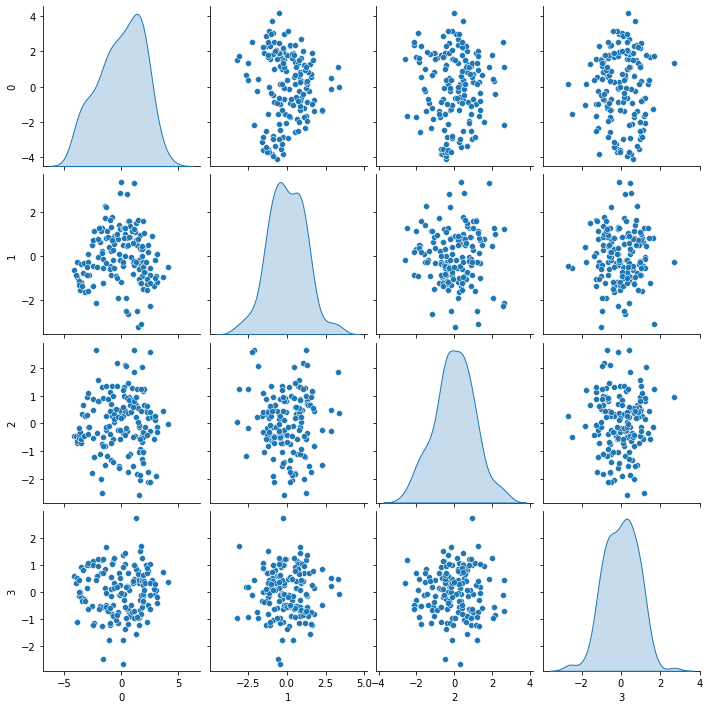

In [9]:
sns.pairplot ( df , diag_kind ='kde' ) ;

### **2.1.2 - Elbow Plot**

In [10]:
from sklearn.cluster import KMeans

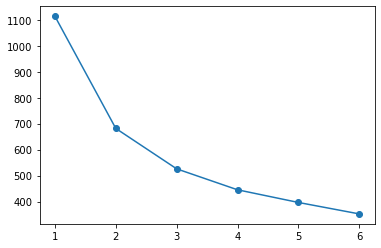

In [11]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [12]:
from   sklearn.metrics   import  silhouette_score

In [13]:
scores = []

for k in range(2,7):                                                               

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels )
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [14]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0 )  .head()    .style.hide_index()

k,Avg Silhouette Score
2,0.328804
3,0.281541
5,0.277899
4,0.274448
6,0.254836


### **2.1.4 - Dendrogram**

In [15]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

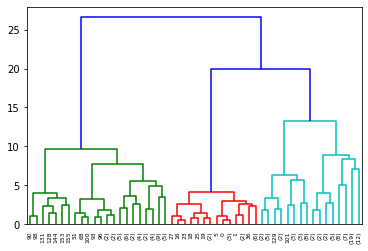

In [16]:
model  =  AgglomerativeClustering  (affinity ='euclidean' ,  linkage ='ward')

model.fit (df)

Z = linkage (df , 'ward')

dendrogram ( Z  ,  p=5  ,  truncate_mode='level')                                                  

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2 |         
| Silhouette | 2 |
| Dendrogram | 2,3 |

In [17]:
KM    =  KMeans ( n_clusters=2 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [18]:
labels      =  KM.predict (df)                                        

df["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

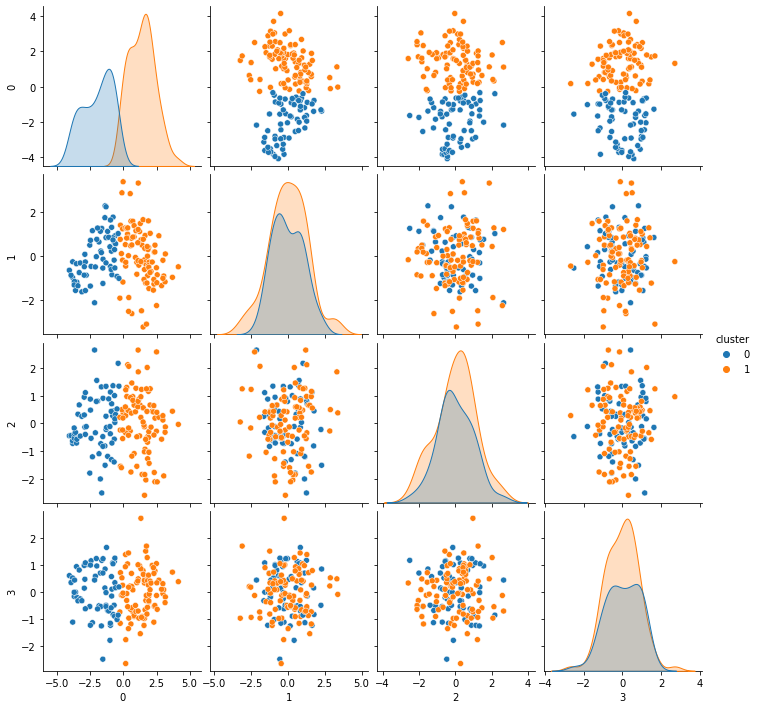

In [19]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster' ) ;

### **2.4.2 - Boxplot**

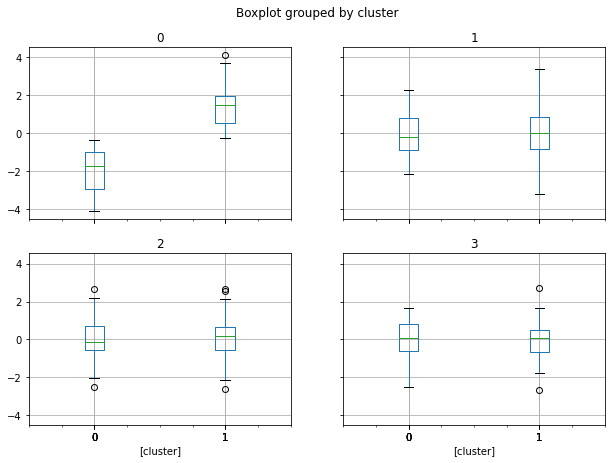

In [20]:
df.boxplot (by='cluster', figsize=(10,7))

plt.show()

### **2.4.3 - Scatterplot**

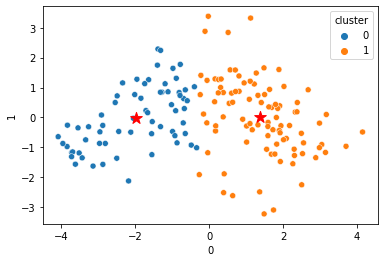

In [21]:
sns.scatterplot ( x= df[0] ,  y = df[1]  ,  hue = 'cluster' , data=df )  

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='red' , marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Signifies |
| ---    | ---    |
| 0  | Sad Countries  |         
| 1 | Happy Countries  |